<h1>UFPB</h1>
<h2>Projeto final - Inteligência Artificial</h2>
<h4>Professora: Thais Gaudencio</h4>
<h3>Dupla: </h3>
<ul>
<li>Lucas Moreira e Silva Alves - 20170027336</li>
<li>Renan Almeida Goes Vieira de Melo - 20170021539</li>
</ul>

<hr>

<h2>Implementação de Redes Neurais Convolucionais para prever cachorros ou gatos</h2>
<h5><li> Esse tipo de rede neural é ideal para aplicações em visão computacional</li></h5>
<h5><li> Usa redes neurais artificiais como base, mas com camadas de convolução, que irá preservar a estrutura da imagem, em que cada camada de convolução está relacionado a uma análise mais aprofundada da imagem, e os filtros passam a ser mais complexos</li></h5>
<h5><li> Ao longo do código e execução dos modelos serão explicados todos os passos desse modelo para classificação binária</li></h5>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Convolution2D
from IPython.core.display import display, HTML
from IPython.core.display import Image
import tensorflow
import numpy as np
from keras.preprocessing import image

In [4]:
a = Image('convolution_.png')
b = Image('pooling_.png')
c = Image('flatten.png')
d = Image('rede.png')
e = Image('steps.png')
f = Image('dropout_.png')
g = Image('dataset/single_prediction/cat_or_dog_1.jpg')
h = Image('dataset/single_prediction/cat_or_dog_2.jpg')
j = Image('dataset/single_prediction/cat_or_dog_3.jpg')
k = Image('dataset/single_prediction/cat_or_dog_4.jpg')
l = Image('dataset/single_prediction/cat_or_dog_5.jpg')
m = Image('dataset/single_prediction/cat_or_dog_6.jpg')
n = Image('dataset/single_prediction/cat_or_dog_7.jpg')
o = Image('dataset/single_prediction/cat_or_dog_8.jpg')
p = Image('dataset/single_prediction/cat_or_dog_9.jpg')

<h4><li>Aqui é definida a função de previsão do animal retratado em uma imagem</li></h4>

In [5]:
def predictions(path, training_set):
    test_image = image.load_img(path, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    training_set.class_indices
    
    if result[0][0] == 1:
        prediction = 'Dog'
        display(HTML('<h1>Dog!</h1>'))


    else:
        prediction = 'Cat'
        display(HTML('<h1>Cat!</h1>'))

<h2>Inicializando da RNC com uma sequência de camadas de convolução</h2>

In [7]:
model = Sequential()

<h4><li>O gif apresentado demonstra a construção da parte convolucional onde o filtro é passado na imagem</li></h4>

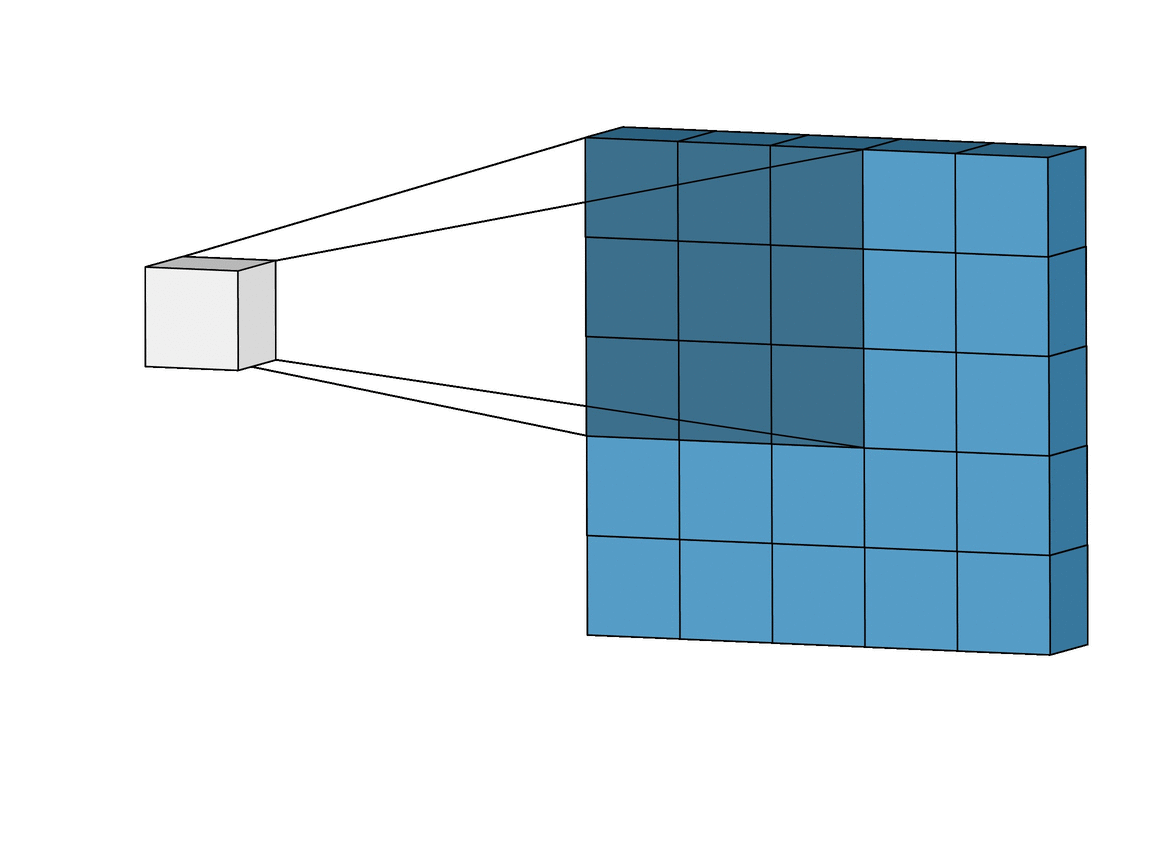

In [8]:
display(a)

<hr>

<h4><li>Para a classificação foram usados 42 filtros de formato 3x3</li></h4>
<h4><li>Também foi necessário alterar o formato das imagens dado que cada uma possui tamanho diferente, para tal usamos um formato 128x128x3, sendo 3 dado pelo fato que as imagens tem cores na forma RGB</li></h4>
<h4><li>Outrossim, é usada a função de ativação retificadora 'relu' que evita que valores negativos sejam usados nos filtros</li></h4>

In [12]:
model.add(Convolution2D(42, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

<h4><li>Nessa etapa é feito o Max Pooling no qual, após a convolução, os resultados terão seu tamanho reduzido a partir de uma técnica em que o maior elemento de uma secção do feature map é selecionado para a nova matriz, a fim de diminuir a dimensão da original</li></h4>
<h4><li>A razão deste método ter sido utilizado é dado pelo fato de que desta forma serão considerados as características de mais destaque da imagem, entquanto que o average pooling daria um resultado mais suave e não seria tão bom para detecção de tipo de imagens. E a matriz gerada pelo pooling será da forma 2x2</li></h4>

In [13]:
model.add(MaxPooling2D(pool_size = (2, 2)))

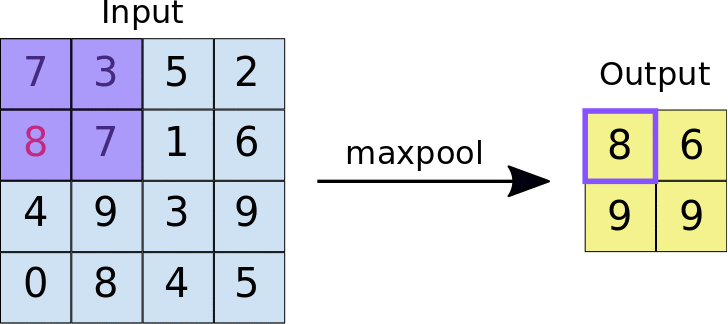

In [14]:
display(b)

<hr>

<h4><li>Antes da etapa de flattening é rodada mais uma etapa de convolução e pooling após a anterior, visando obter melhor acurácia dado que desta forma mais filtros serão passados e maior será a probabilidade da obtenção de características particulares da imagem</li><h4>

In [15]:
model.add(Convolution2D(42, 3, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

<hr>
<h4><li>Aqui é realizada a etapa de flattening na qual as feature maps pós-pooling serão transformadas em conjuntos de neurônios da rede neural, em que cada feature map passa a ser uma camada da topologia desta</li><h4>

In [16]:
model.add(Flatten())

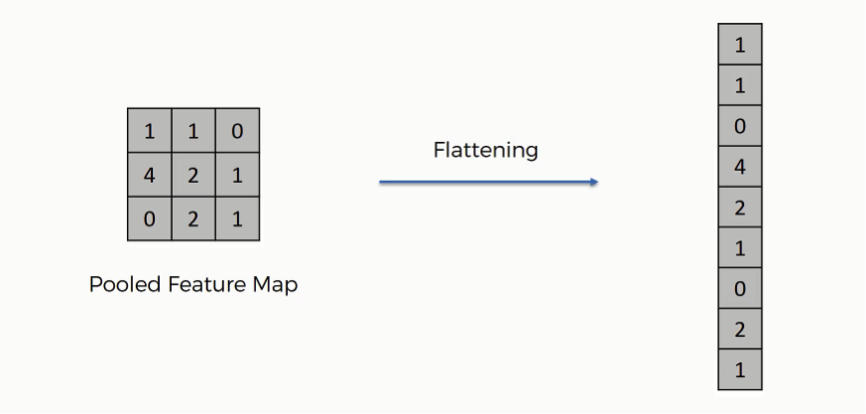

In [17]:
display(c)

<h4><li>Nesta etapa é realizada a conexão entre os neurônios, que servirá para fazer a previsão do modelo</li></h4>
<h4><li>Os itens dessa nova fase são relacionados ao output e às camadas totalmente conectadas. Para o output foi utilizada a função sigmoidal por ela retornar valores binários</li></h4>

In [18]:
model.add(Dense(output_dim = 128, activation = 'relu'))
model.add(Dense(output_dim = 1, activation = 'sigmoid'))

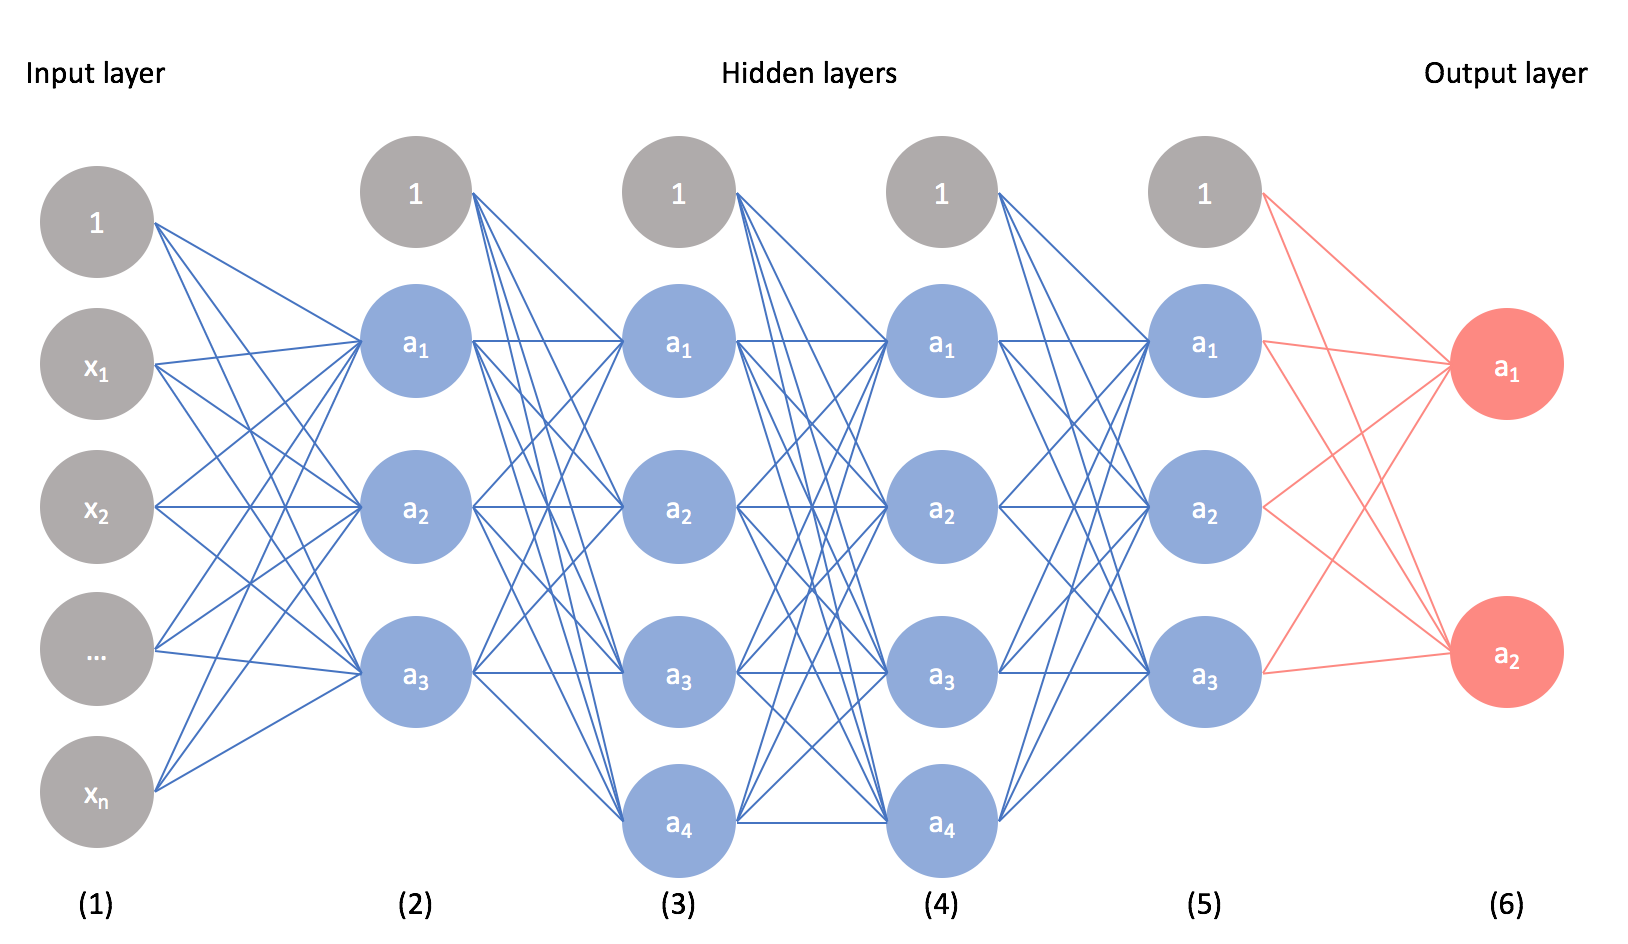

In [19]:
display(d)

<h2>Modelo completo</h2>

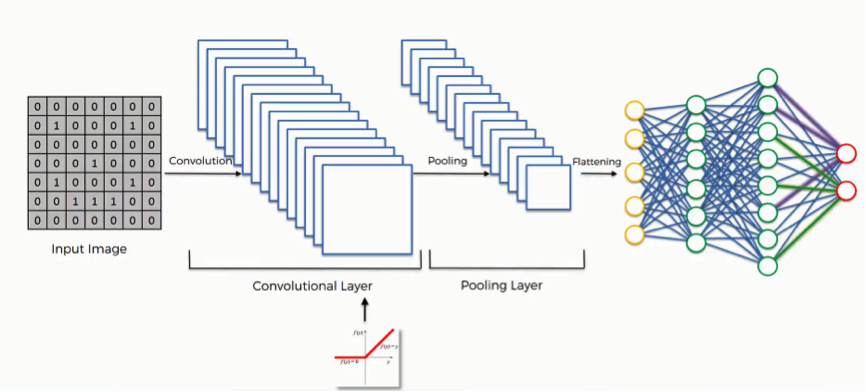

In [20]:
display(e)

<hr>

<h4><li>Esta etapa realiza a compilação da rede neural, fora utilizada a função Adam de método do gradiente por ter sido criada especificamente para Deep Learning.</li></h4>
<h4><li>A função de perda utilizada foi Cross Entropy Binary, visto que a saída é um valor binário</li></h4>
<h4><li>A métrica utilizada para a rede foi Acurácia por ser um problema de classificação</li></h4>

In [22]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

<h4><li>Antes da execução da rede neural é realizada uma geração de novas imagens para o treinamento. Para tanto é realizado um processo de criação de novas imagens a partir da alteração das imagens já utilizadas, onde elas serão invertidas, ampliadas e reescaladas em novas imagens, objetivando um maior dataset e melhores previsões</li></h4>

In [23]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.21,
        zoom_range=0.27,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

<h4><li>A próxima parte será o treinamento dos dados, na qual as imagens da base de dados deverão passar pela rede neural buscando a alteração da mesma dada a acurácia</li></h4>

In [24]:
training = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


<h4><li>Nesta fase será realizado o teste da base de dados, na qual a rede neural obtida deverá classificar as imagens de forma </li></h4>

In [25]:
testing = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


<h4><li>A última etapa deverá ser o ajustamento da rede, para tal foram usadas 8000 batches e 30 épocas</li></h4>

In [26]:
model.fit_generator(
        training,
        steps_per_epoch=8000,
        epochs=30,
        validation_data=testing,
        validation_steps=2000)

model.save('Models/CNN_wheights.h5')


Epoch 1/30
8000/8000 [==============================] - 894s 112ms/step - loss: 0.3865 - acc: 0.8165 - val_loss: 0.3844 - val_acc: 0.8400
Epoch 2/30
8000/8000 [==============================] - 882s 110ms/step - loss: 0.1657 - acc: 0.9334 - val_loss: 0.5561 - val_acc: 0.8413
Epoch 3/30
8000/8000 [==============================] - 910s 114ms/step - loss: 0.0900 - acc: 0.9659 - val_loss: 0.7435 - val_acc: 0.8259
Epoch 4/30
8000/8000 [==============================] - 885s 111ms/step - loss: 0.0650 - acc: 0.9762 - val_loss: 0.9011 - val_acc: 0.8219
Epoch 5/30
8000/8000 [==============================] - 862s 108ms/step - loss: 0.0538 - acc: 0.9808 - val_loss: 0.8507 - val_acc: 0.8322
Epoch 6/30
8000/8000 [==============================] - 899s 112ms/step - loss: 0.0447 - acc: 0.9839 - val_loss: 0.9896 - val_acc: 0.8293
Epoch 7/30
8000/8000 [==============================] - 973s 122ms/step - loss: 0.0393 - acc: 0.9861 - val_loss: 1.0191 - val_acc: 0.8345
Epoch 8/30
8000/8000 [===========

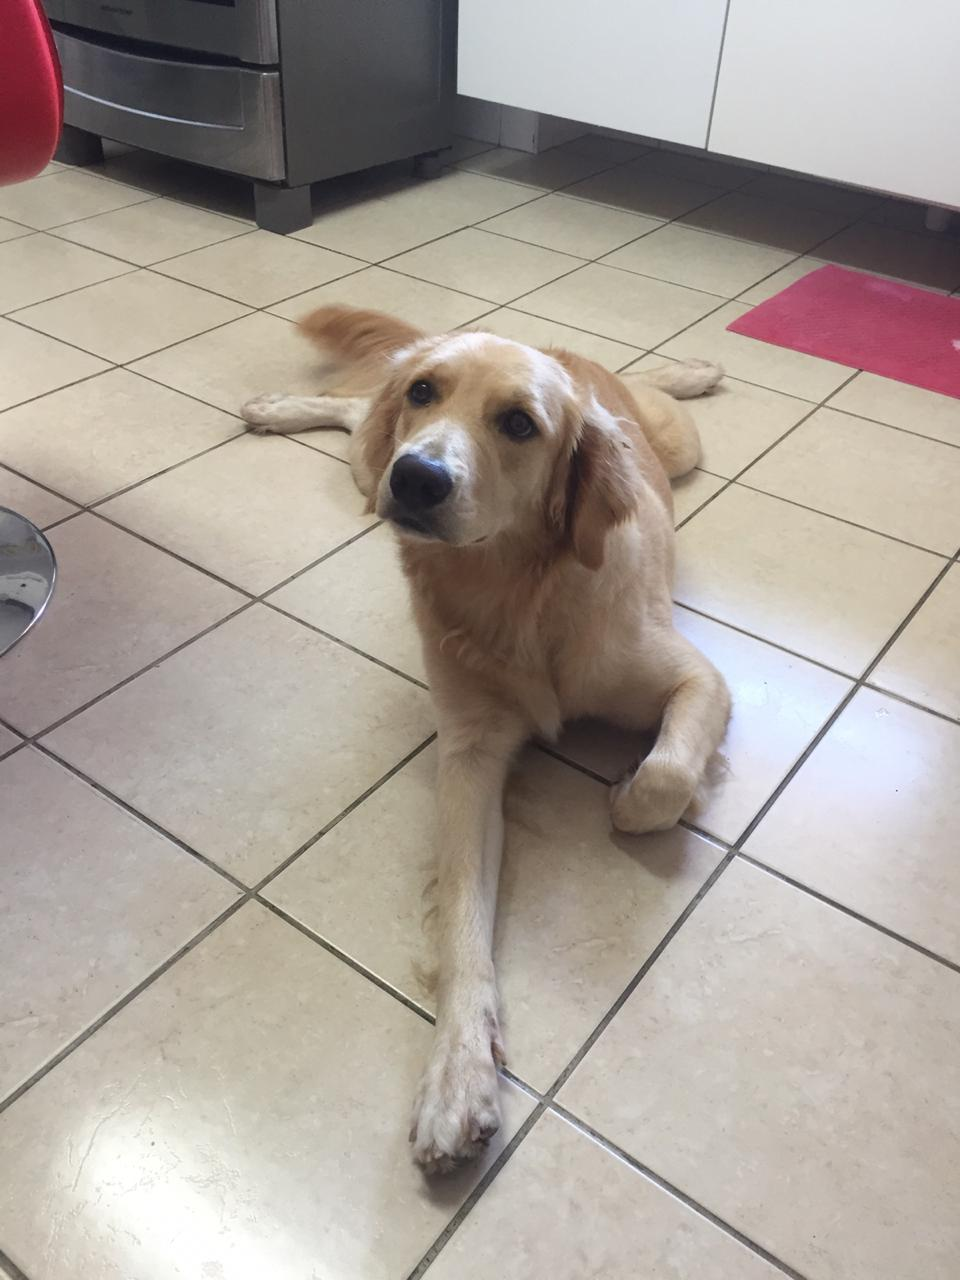

In [27]:
display(g)

In [28]:
predictions('dataset/single_prediction/cat_or_dog_1.jpg', training)

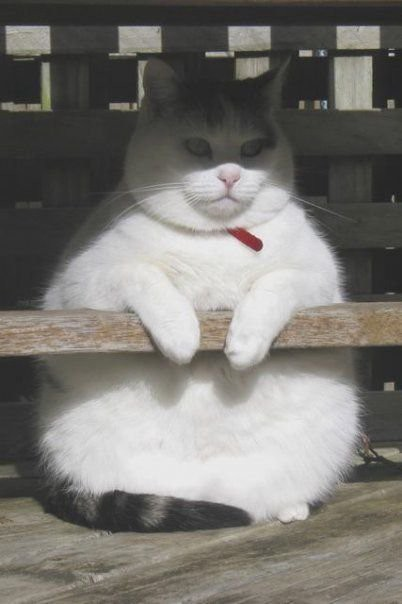

In [29]:
display(h)

In [30]:
predictions('dataset/single_prediction/cat_or_dog_2.jpg', training)

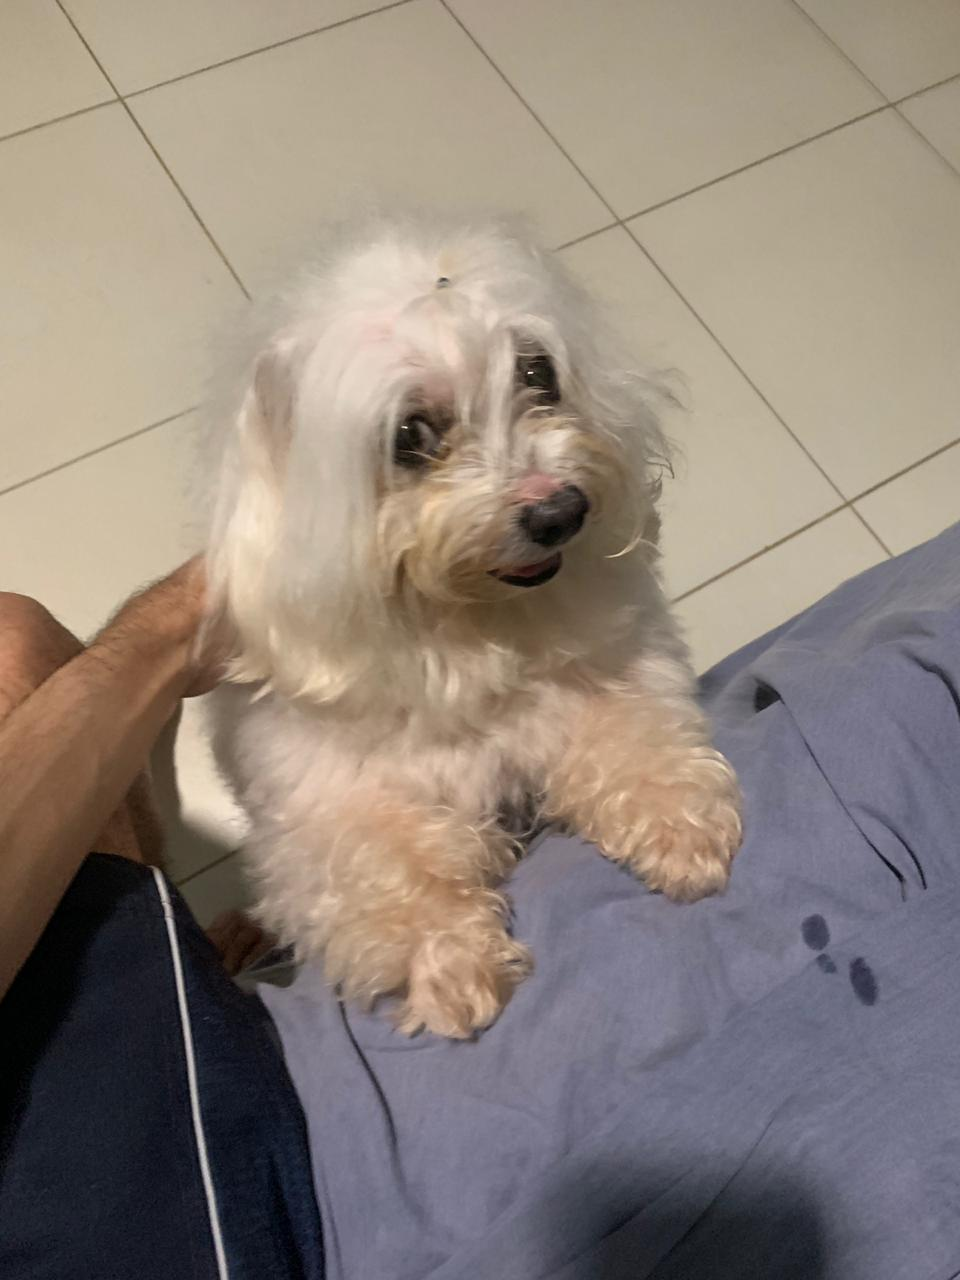

In [31]:
display(j)

In [32]:
predictions('dataset/single_prediction/cat_or_dog_3.jpg', training)

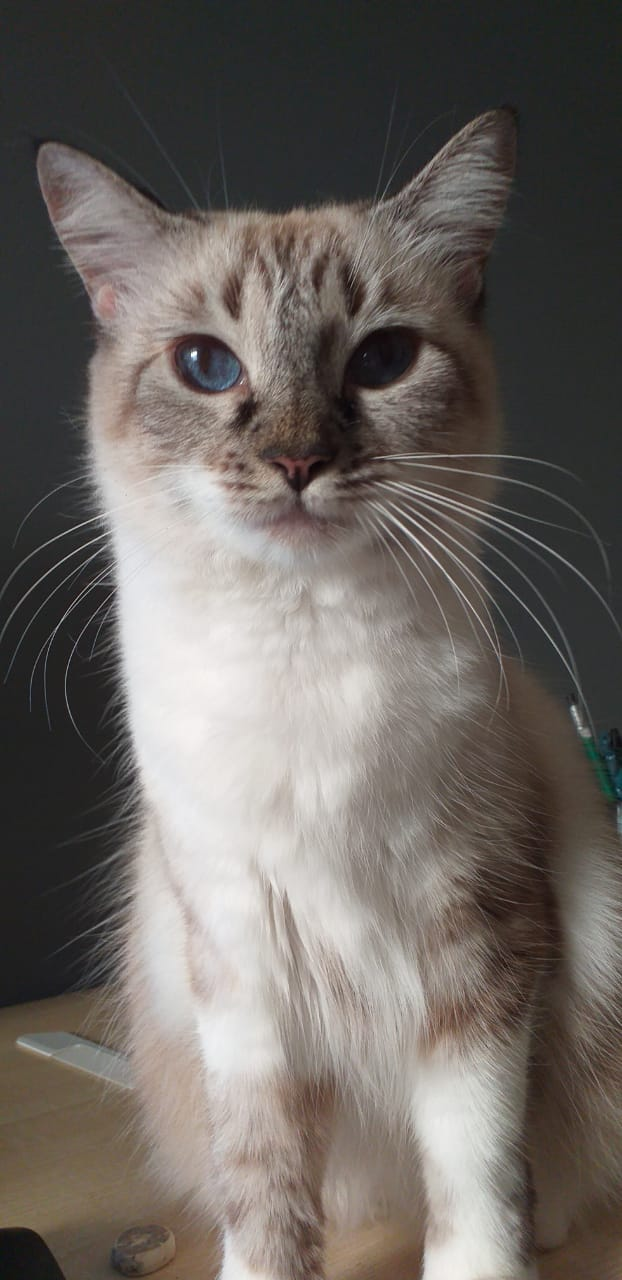

In [33]:
display(k)

In [34]:
predictions('dataset/single_prediction/cat_or_dog_4.jpg', training)

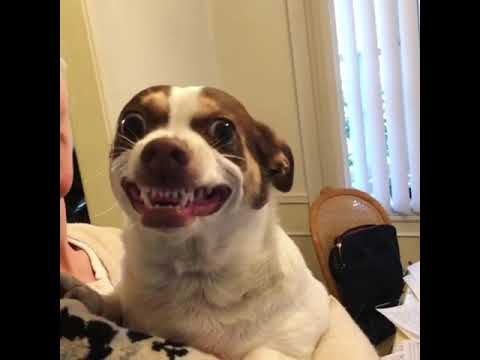

In [35]:
display(m)

In [36]:
predictions('dataset/single_prediction/cat_or_dog_6.jpg', training)

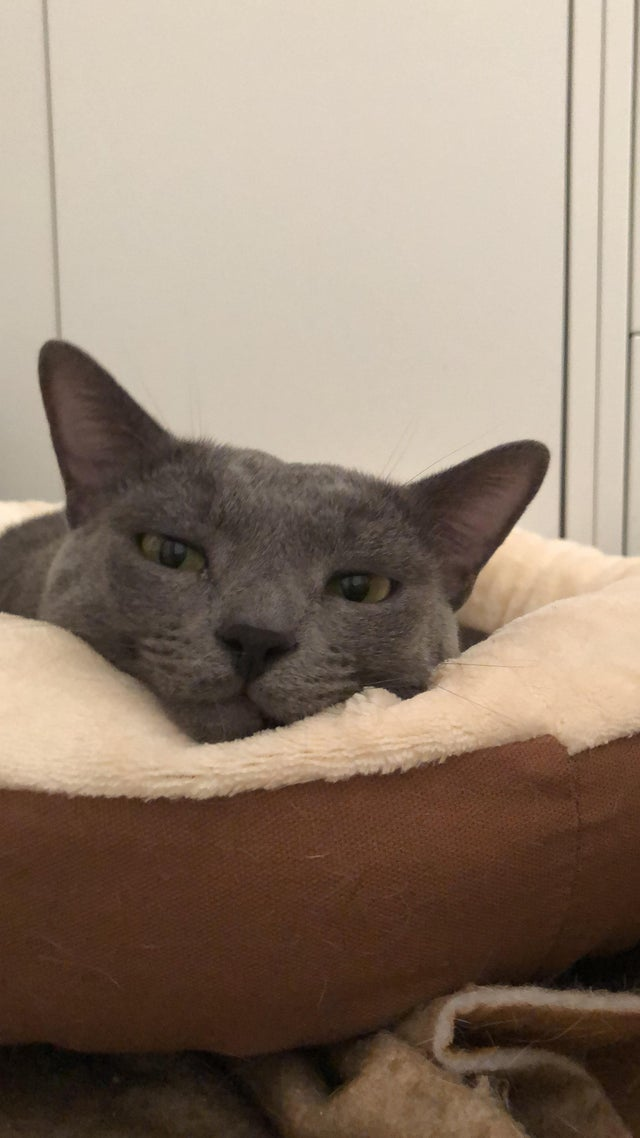

In [37]:
display(n)

In [38]:
predictions('dataset/single_prediction/cat_or_dog_7.jpg', training)

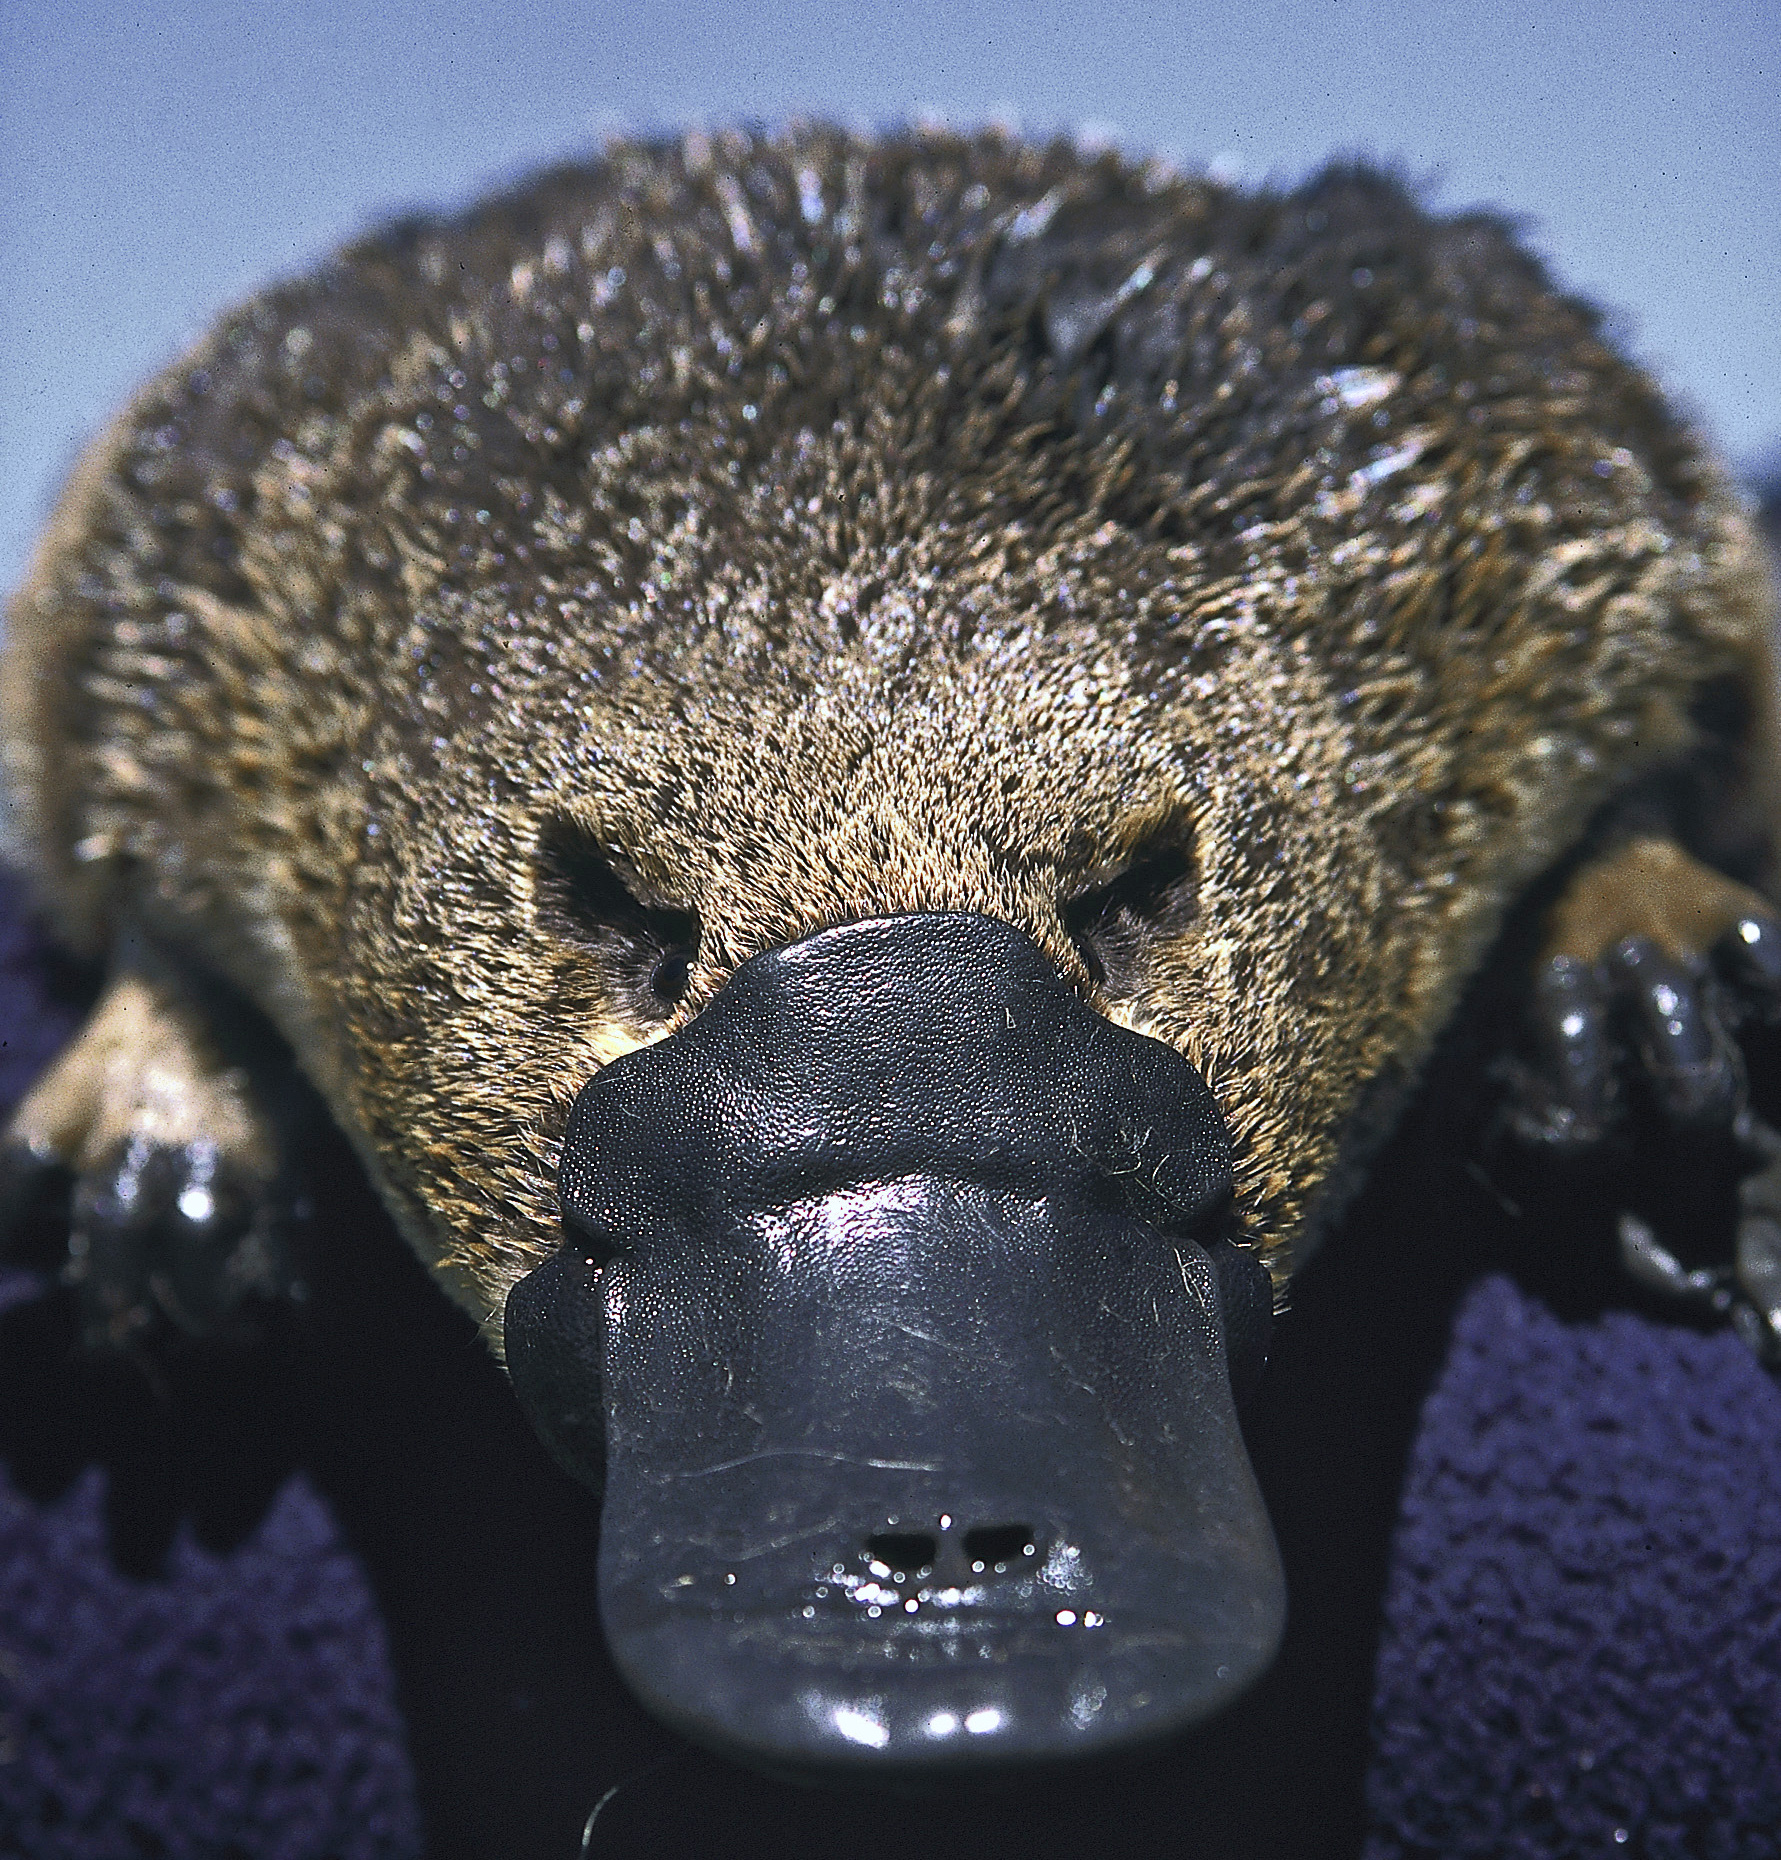

In [39]:
display(o)

In [40]:
predictions('dataset/single_prediction/cat_or_dog_8.jpg', training)

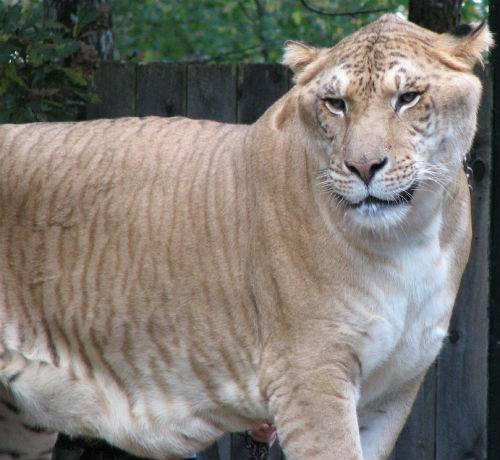

In [41]:
display(p)

In [42]:
predictions('dataset/single_prediction/cat_or_dog_9.jpg', training)

<hr>
<h2>Conclusão:<h2>
    <h4><li>Com uma acurácia de 82% a previsão dos resultados foi satisfatória, porém melhoras poderiam ser feitas, uma destas formas seria aumentar a base de dados, adicionando imagens diferentes que permitam a rede perceber novos padrões que se encaixem com características de cães e gatos, assim sendo possível reconhecer mais cães e gatos (por exemplo, a rede errou o gato deitado na cama que foi testado, poderiam ser inseridas mais imagens de gatos deitados a fim de melhorar a acurácia do modelo). Essas diferenças entre imagens podem ser, por exemplo, a raça do animal, a posição em que ele se encontra ou o ângulo. Idealmente a base de dados conteria todas as possíveis combinações de imagens com diferentes características que se encaixam na definição de gato ou cachorro, pois assim todos os possíveis padrões poderiam ser percebidos.</li></h4>
    <h4><li>Outra possível forma de melhora seria a mudança de parâmetros, pois quanto maiores os números de camadas, épocas, batches e de neurônios por camada, mais padrões podem ser reconhecidos, a desvantagem seria o tempo necessário para a execução e a possibilidade de overfitting, sendo assim as possíveis mudanças nestes parâmetros teriam que ser testadas para cada caso até se encontrar uma solução ótima que funcione em uma faixa de tempo desejável.</li></h4>
    <h4><li>Foram testados resultados com imagens de outros animais também, apenas para observar em que categoria o algoritmo iria encaixa-lo</li></h4>
